# <font color=indianred> Goal: extract data for apartments in SF Neighborhoods from Craigslist

In [2]:
# Import dependencies
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import re

In [4]:
# Neighborhood codes
lowernobhill = 20
nobhill = 19
pacheights = 23
russianhill = 27
marina = 17
northbeach = 22

# Set up parameters and response to link 
# Change nh= to the neighborhood you want to explore
url_base = 'https://sfbay.craigslist.org/search/sfc/apa?nh=20&nh=24&nh=17&nh=19&nh=22&nh=23&nh=27'
params = dict(max_bedrooms=2, min_bedrooms=2, max_price=3500, housing_type=1)
response = requests.get(url_base, params=params)
print(response.url)


https://sfbay.craigslist.org/search/sfc/apa?nh=20&nh=24&nh=17&nh=19&nh=22&nh=23&nh=27&max_bedrooms=2&min_bedrooms=2&max_price=3500&housing_type=1


In [5]:
# Connect to BeautifulSoup and define the parser as HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Find all apts that fit the specified criteria and # of apts
apts = soup.find_all('p', attrs={'class':'result-info'})
print(len(apts))

30


## <font color=salmon> Parse through Craigslist results</font>

In [6]:
# results are returned as an iterable list
results = soup.find_all('li', class_="result-row")
list_results = []


# Loop through returned results
for result in results:
    # Error handling
    try:
        # Identify and return title of listing
        title = result.find('a', class_="result-title").text
        # Identify and return price of listing
        price = result.a.span.text.strip('$')
        # Identify number of rooms
        n_rooms = result.find('span', class_ = 'housing').text.split()
        # Identify and return link to listing
        link = result.a['href']
        # Identify posting date
        post_time = result.find('time')['datetime']
        post_time = pd.to_datetime(post_time)
        # Identify neighborhood
        neighborhood = result.find('span', class_= 'result-hood').text
        
        list_results.append({'#bedrooms': n_rooms, '$price': price,
                        'Post_Title': title, 'URL': link, 'Post_Time': post_time, 'Neighborhood': neighborhood})
        
        # Print results only if title, price, and link are available
        if (title and price and link):
            print('-------------')
            print(title)
            print(price)
            print(n_rooms)
            print(link)
            print(post_time)
            print(neighborhood)
    except AttributeError as e:
        print(e)
        

-------------
2 BR Available For Rent- $3400
3400
['2br', '-']
https://sfbay.craigslist.org/sfc/apa/d/san-francisco-2-br-available-for-rent/6819123051.html
2019-02-14 07:24:00
 (nob hill)
-------------
One-Two Bedroom/One bath in Sunny North Beach
3350
['2br', '-', '700ft2', '-']
https://sfbay.craigslist.org/sfc/apa/d/san-francisco-one-two-bedroom-one-bath/6796629675.html
2019-02-13 21:02:00
 (north beach / telegraph hill)
-------------
One-Two Bedroom/One bath in Sunny North Beach
3350
['2br', '-', '700ft2', '-']
https://sfbay.craigslist.org/sfc/apa/d/san-francisco-one-two-bedroom-one-bath/6818957815.html
2019-02-13 20:47:00
 (north beach / telegraph hill)
-------------
721 Geary #5 - $95 Move-In Special - Available Now!
3395
['2br', '-']
https://sfbay.craigslist.org/sfc/apa/d/san-francisco-721-geary-5-95-move-in/6796974937.html
2019-02-13 16:10:00
 (lower nob hill)
-------------
Pine/Powell Sts 4 rm, 2 bd, liv rm, wd laminate flr, nr fin distric
2900
['2br', '-', '800ft2', '-']
https

## <font color=salmon> Create DataFrame from Results </font>

In [7]:
# Create DataFrame
apt_df = pd.DataFrame(list_results)

# Clean data and remove text for room/ 
bedrooms = apt_df['#bedrooms']
rooms = []

for room in bedrooms:
    rooms.append(room[0].strip('br'))

apt_df['#rooms'] = rooms
apt_df['Post_Time'] = apt_df['Post_Time'].dt.date

apt_df

,#bedrooms,$price,Neighborhood,Post_Time,Post_Title,URL,#rooms
0,"[2br, -]",3400,(nob hill),2019-02-14,2 BR Available For Rent- $3400,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
1,"[2br, -, 700ft2, -]",3350,(north beach / telegraph hill),2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
2,"[2br, -, 700ft2, -]",3350,(north beach / telegraph hill),2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
3,"[2br, -]",3395,(lower nob hill),2019-02-13,721 Geary #5 - $95 Move-In Special - Available...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
4,"[2br, -, 800ft2, -]",2900,(nob hill),2019-02-13,"Pine/Powell Sts 4 rm, 2 bd, liv rm, wd laminat...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
5,"[2br, -]",3495,(lower pac hts),2019-02-13,Modern 2BR/1BA in Lower Pacific Heights,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
6,"[2br, -, 850ft2, -]",2900,(lower pac hts),2019-02-13,SUTTER ST NR. PRESIDIO 2 BR APT. EXC. DESIRABL...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
7,"[2br, -, 675ft2, -]",3300,(nob hill),2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
8,"[2br, -, 675ft2, -]",3100,(nob hill),2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2
9,"[2br, -]",3300,(lower nob hill),2019-02-13,"2 BED SUNNY Remodeled; hdwd, quartz, Micro, di...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2


In [8]:
# Export raw data to Excel for webpage
apt_df.to_excel("python/AptDataRaw.xlsx", index=False)

In [10]:
# Clean data and remove text from #bedrooms and create new column for sqft 

# Split before and after the dash & remove the 'ft2' text
apt_df['#bedrooms'] = apt_df['#bedrooms'].astype(str)
apt_df['#bedrooms'] = apt_df['#bedrooms'].str.split(',').str[2]
apt_df['#bedrooms'].fillna("", inplace=True)
apt_df['#bedrooms'] = apt_df['#bedrooms'].str.split('ft2') 

###############################################################

# Loop through the new bedroom values and remove remaining text that will prevent converting to int
bedrooms = apt_df['#bedrooms']
rooms = []

for room in bedrooms:
    rooms.append(room[0].strip(','))

apt_df['sqft'] = rooms
apt_df['sqft'] = apt_df['sqft'].str.replace(r"'", '')
apt_df['sqft'] = apt_df['sqft'].astype(str)
apt_df['sqft'] = apt_df['sqft'].str.strip()

##############################################################

# Convert values to int and if NAN make = 0
sqfts = apt_df['sqft']
number = []

for sqft in sqfts:
    number.append(sqft)

newsqft = pd.to_numeric(number, errors='ignore')
apt_df['sqft'] = newsqft
apt_df['sqft'].fillna("0", inplace=True)
apt_df['sqft'] = apt_df['sqft'].astype(int)

##############################################################

# Convert price and # rooms to int in order to graph data
apt_df['$price'] = apt_df['$price'].astype(int)
apt_df['#rooms'] = apt_df['#rooms'].astype(int)


##############################################################

# Clean up the Neighborhood name
apt_df['Hood'] = apt_df['Neighborhood'].str.extract(r"\((.*?)\)", expand=False)
apt_df['Hood'] = apt_df['Hood'].astype(str)
apt_df['Hood'] = apt_df['Hood'].str.strip()

neighborhoods = apt_df["Hood"].unique()
new_hoods = ['North Beach', 'Lower Nob Hill', 'Nob Hill', 'Russian Hill', 'Lower Pac Hts', 'Pac Heights']
my_dict = dict(zip(neighborhoods, new_hoods))

apt_df['Hood'].replace(my_dict, inplace=True)


apt_df

,#bedrooms,$price,Neighborhood,Post_Time,Post_Title,URL,#rooms,sqft,Hood
0,[],3400,(nob hill),2019-02-14,2 BR Available For Rent- $3400,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,0,North Beach
1,"[ '700, ']",3350,(north beach / telegraph hill),2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,700,Lower Nob Hill
2,"[ '700, ']",3350,(north beach / telegraph hill),2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,700,Lower Nob Hill
3,[],3395,(lower nob hill),2019-02-13,721 Geary #5 - $95 Move-In Special - Available...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,0,Nob Hill
4,"[ '800, ']",2900,(nob hill),2019-02-13,"Pine/Powell Sts 4 rm, 2 bd, liv rm, wd laminat...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,800,North Beach
5,[],3495,(lower pac hts),2019-02-13,Modern 2BR/1BA in Lower Pacific Heights,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,0,Russian Hill
6,"[ '850, ']",2900,(lower pac hts),2019-02-13,SUTTER ST NR. PRESIDIO 2 BR APT. EXC. DESIRABL...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,850,Russian Hill
7,"[ '675, ']",3300,(nob hill),2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,675,North Beach
8,"[ '675, ']",3100,(nob hill),2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,675,North Beach
9,[],3300,(lower nob hill),2019-02-13,"2 BED SUNNY Remodeled; hdwd, quartz, Micro, di...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2,0,Nob Hill


In [11]:
# New DataFrame to build graphs in
apts_data = apt_df[['#rooms', 'sqft', '$price', 'Hood', 'Post_Time', 'Post_Title', 'URL']]

apts_data.dtypes

#rooms         int32
sqft           int32
$price         int32
Hood          object
Post_Time     object
Post_Title    object
URL           object
dtype: object

In [38]:
# Export data to Excel for webpage
apts_data.to_excel("python/AptData.xlsx", index=False)

# <font color=salmon> Send data to SlackBot </font>

In [12]:
import os
from slackclient import SlackClient
import pprint
from collections import Counter

In [13]:
slack_data = apts_data.to_dict('records')
str(slack_data)
slack_data

[{'#rooms': 2,
  'sqft': 0,
  '$price': 3400,
  'Hood': 'North Beach',
  'Post_Time': datetime.date(2019, 2, 14),
  'Post_Title': '2 BR Available For Rent- $3400',
  'URL': 'https://sfbay.craigslist.org/sfc/apa/d/san-francisco-2-br-available-for-rent/6819123051.html'},
 {'#rooms': 2,
  'sqft': 700,
  '$price': 3350,
  'Hood': 'Lower Nob Hill',
  'Post_Time': datetime.date(2019, 2, 13),
  'Post_Title': 'One-Two Bedroom/One bath in Sunny North Beach',
  'URL': 'https://sfbay.craigslist.org/sfc/apa/d/san-francisco-one-two-bedroom-one-bath/6796629675.html'},
 {'#rooms': 2,
  'sqft': 700,
  '$price': 3350,
  'Hood': 'Lower Nob Hill',
  'Post_Time': datetime.date(2019, 2, 13),
  'Post_Title': 'One-Two Bedroom/One bath in Sunny North Beach',
  'URL': 'https://sfbay.craigslist.org/sfc/apa/d/san-francisco-one-two-bedroom-one-bath/6818957815.html'},
 {'#rooms': 2,
  'sqft': 0,
  '$price': 3395,
  'Hood': 'Nob Hill',
  'Post_Time': datetime.date(2019, 2, 13),
  'Post_Title': '721 Geary #5 - $95 M

In [14]:
# Convert dictionary data to CSV 
dict_data =(pd.DataFrame.from_dict(data=slack_data, orient='columns').to_csv('python/DictData.csv', header=False))

In [16]:
SLACK_TOKEN = "API_TOCKEN_HERE"
SLACK_CHANNEL = "#housing"

sc = SlackClient(SLACK_TOKEN)

sc.api_call(
    "chat.postMessage", channel=SLACK_CHANNEL, text=pretty_dict_str,
    username='pybot', icon_emoji=':robot_face:'
)

{'ok': True,
 'channel': 'CG4PC5PQQ',
 'ts': '1550171672.000300',
 'message': {'type': 'message',
  'subtype': 'bot_message',
  'text': "  '$price': 3500,\n  'Hood': 'Pac Heights',\n  'Post_Time': datetime.date(2019, 2, 8),\n  'Post_Title': 'Conveniently Located 2BR',\n  'URL': '<https://sfbay.craigslist.org/sfc/apa/d/san-francisco-conveniently-located-2br/6814406969.html>',\n  'sqft': 0},\n {'#rooms': 2,\n  '$price': 3195,\n  'Hood': 'North Beach',\n  'Post_Time': datetime.date(2019, 2, 7),\n  'Post_Title': 'Beautiful 2 Bedroom 1 Bath with 2 Big Walking Closets',\n  'URL': '<https://sfbay.craigslist.org/sfc/apa/d/san-francisco-beautiful-2-bedroom-1/6813850217.html>',\n  'sqft': 0}]",
  'ts': '1550171672.000300',
  'username': 'pybot',
  'icons': {'emoji': ':robot_face:',
   'image_64': 'https://a.slack-edge.com/37d58/img/emoji_2017_12_06/apple/1f916.png'},
  'bot_id': 'BG8FFF9PZ'},
 'headers': {'Content-Type': 'application/json; charset=utf-8',
  'Content-Length': '495',
  'Connection

## <font color=salmon> Build visualizations for analysis </font>

In [17]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [19]:
apts_data.describe()

,#rooms,sqft,$price
count,29.0,29.000000,29.000000
mean,2.0,344.103448,3134.724138
std,0.0,398.019054,403.264704
min,2.0,0.000000,1850.000000
25%,2.0,0.000000,2988.000000
50%,2.0,0.000000,3250.000000
75%,2.0,700.000000,3400.000000
max,2.0,1038.000000,3500.000000


### <font color=darksalmon> Neighborhood Analysis </font>

In [20]:
hoods = apts_data['Hood']
hoods.sort_values()

1     Lower Nob Hill
2     Lower Nob Hill
25    Lower Nob Hill
19    Lower Nob Hill
12    Lower Nob Hill
21     Lower Pac Hts
10     Lower Pac Hts
3           Nob Hill
23          Nob Hill
15          Nob Hill
9           Nob Hill
13          Nob Hill
0        North Beach
18       North Beach
20       North Beach
26       North Beach
17       North Beach
14       North Beach
11       North Beach
8        North Beach
7        North Beach
4        North Beach
16       North Beach
28       North Beach
27       Pac Heights
22      Russian Hill
6       Russian Hill
24      Russian Hill
5       Russian Hill
Name: Hood, dtype: object

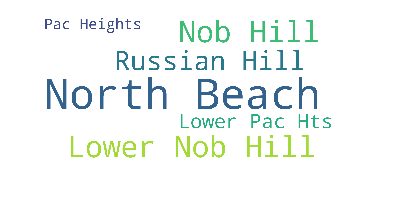

In [21]:
word_could_dict = Counter(hoods)
wordcloud = WordCloud(background_color='white', mode = "RGB", width = 2000, height=1000).generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


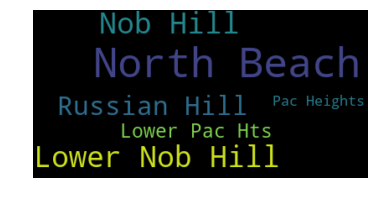

In [22]:
word_could_dict = Counter(hoods)
wordcloud = WordCloud().generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud.to_file('Word_Cloud.png')

In [24]:
apts_data.sort_values('Hood',ascending=False)

,#rooms,sqft,$price,Hood,Post_Time,Post_Title,URL
24,2,0,3400,Russian Hill,2019-02-09,Beautiful Apartment-Lower Pac Heights,https://sfbay.craigslist.org/sfc/apa/d/beautif...
5,2,0,3495,Russian Hill,2019-02-13,Modern 2BR/1BA in Lower Pacific Heights,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
6,2,850,2900,Russian Hill,2019-02-13,SUTTER ST NR. PRESIDIO 2 BR APT. EXC. DESIRABL...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
22,2,850,2950,Russian Hill,2019-02-10,SUTTER ST NR. PRESIDIO 2 BR APT. EXC. DESIRABL...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
27,2,0,3500,Pac Heights,2019-02-08,Conveniently Located 2BR,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
0,2,0,3400,North Beach,2019-02-14,2 BR Available For Rent- $3400,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
16,2,750,3495,North Beach,2019-02-11,New Two Bedroom in Nob Hill,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
26,2,675,2700,North Beach,2019-02-08,"2 bedroom, 1 bathroom apartment",https://sfbay.craigslist.org/sfc/apa/d/san-fra...
20,2,0,3400,North Beach,2019-02-10,2 BR Available For Rent- $3400,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
18,2,0,2950,North Beach,2019-02-11,2 Bedroom 1 Bathroom Recently Renovated Apt Av...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...


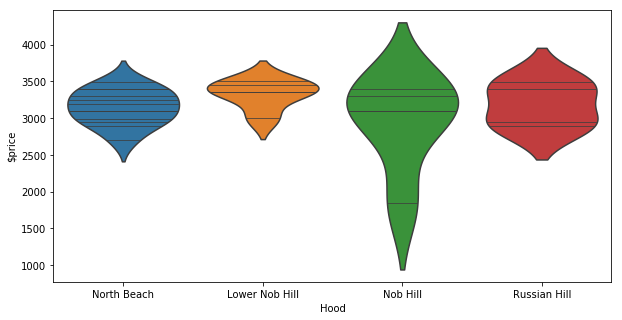

In [25]:
counts = apts_data.Hood.value_counts()
loc_gt2 = counts[counts > 2]

popular_locations = apts_data[apts_data.Hood.isin(loc_gt2.keys())]

plt.figure(figsize=(10,5))
sns.violinplot(x="Hood", y="$price", data=popular_locations, scale="width", inner="stick")
plt.show();

In [ ]:
new_hoods = ['North Beach', 'Lower Nob Hill', 'Nob Hill', 'Russian Hill', 'Lower Pac Hts', 'Pac Heights']

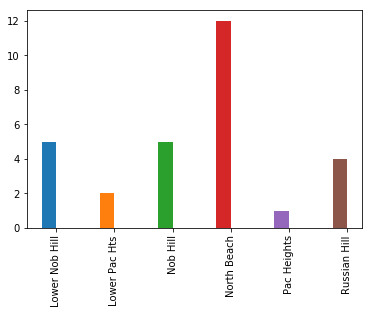

In [72]:
width = .25    
apts_data['Hood'].value_counts().sort_index().plot('bar', position=1, width = width)
plt.show()

In [73]:
apts_data['Hood'].unique()

array(['North Beach', 'Lower Nob Hill', 'Nob Hill', 'Russian Hill',
       'Lower Pac Hts', 'Pac Heights'], dtype=object)

In [81]:
apts_data

,#rooms,sqft,$price,Hood,Post_Time,Post_Title,URL
0,2,0,3400,North Beach,2019-02-14,2 BR Available For Rent- $3400,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
1,2,700,3350,Lower Nob Hill,2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
2,2,700,3350,Lower Nob Hill,2019-02-13,One-Two Bedroom/One bath in Sunny North Beach,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
3,2,0,3395,Nob Hill,2019-02-13,721 Geary #5 - $95 Move-In Special - Available...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
4,2,800,2900,North Beach,2019-02-13,"Pine/Powell Sts 4 rm, 2 bd, liv rm, wd laminat...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...
5,2,0,3495,Russian Hill,2019-02-13,Modern 2BR/1BA in Lower Pacific Heights,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
6,2,850,2900,Russian Hill,2019-02-13,SUTTER ST NR. PRESIDIO 2 BR APT. EXC. DESIRABL...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
7,2,675,3300,North Beach,2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
8,2,675,3100,North Beach,2019-02-13,2 Bedrooms flat - 1 Bath,https://sfbay.craigslist.org/sfc/apa/d/san-fra...
9,2,0,3300,Nob Hill,2019-02-13,"2 BED SUNNY Remodeled; hdwd, quartz, Micro, di...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...


In [79]:
hoods_df = apts_data.groupby(['Hood']).agg({'URL': 'count', '$price': 'mean'}).rename(columns = {'URL': 'Apt Count', '$price': '$Price Avg'}).reset_index()

hoods_df

,Hood,Apt Count,$Price Avg
0,Lower Nob Hill,5,3329.800000
1,Lower Pac Hts,2,2750.000000
2,Nob Hill,5,2947.000000
3,North Beach,12,3148.166667
4,Pac Heights,1,3500.000000
5,Russian Hill,4,3186.250000


In [101]:
hoods_df.describe()

,Apt Count,$Price Avg
count,6.000000,6.000000
mean,4.833333,3143.536111
std,3.868678,267.246617
min,1.000000,2750.000000
25%,2.500000,2997.291667
50%,4.500000,3167.208333
75%,5.000000,3293.912500
max,12.000000,3500.000000


In [82]:
NorthBeach = hoods_df.loc[hoods_df['Hood'] == 'North Beach']
LowerNob = hoods_df.loc[hoods_df['Hood'] == 'Lower Nob Hill']
NobHill = hoods_df.loc[hoods_df['Hood'] == 'Nob Hill']
RussianHill = hoods_df.loc[hoods_df['Hood'] == 'Russian Hill']
LowerPacHts = hoods_df.loc[hoods_df['Hood'] == 'Lower Pac Hts']
PacHeights = hoods_df.loc[hoods_df['Hood'] == 'Pac Heights']


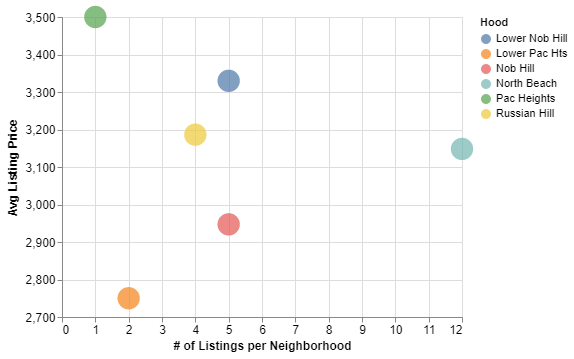

In [99]:
import altair as alt
alt.renderers.enable('notebook')

source = hoods_df

alt.Chart(source).mark_circle(size=500).encode(
    x=alt.X('Apt Count', axis=alt.Axis(title='# of Listings per Neighborhood')),
    y=alt.Y('$Price Avg', axis=alt.Axis(title='Avg Listing Price'), scale=alt.Scale(zero=False)),
    color='Hood',
    tooltip=['Hood', 'Apt Count', '$Price Avg'], 
).configure_axis(labelFontSize=12, titleFontSize=12).configure_legend(labelFontSize=11, titleFontSize=11)